In [ ]:
!pip install optuna
!pip install pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Installing Neccessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import math
import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, VotingClassifier

from sklearn.model_selection import train_test_split,cross_val_score, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import cross_validate
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer,KNNImputer
from scipy.stats.mstats import winsorize

from imblearn.over_sampling import SMOTE
import optuna
from pandas_profiling import ProfileReport

from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix,f1_score,make_scorer,roc_auc_score


%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading Data
data = pd.read_csv("/content/drive/MyDrive/Hackathon/analytics vidhya/Loan Prediction/train.csv")
data = data.drop(['Loan_ID'],axis = 1)

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
print("Size of Dataset: {} rows , {} columns".format(data.shape[0],data.shape[1]))

Size of Dataset: 614 rows , 12 columns


In [ ]:
print("data types : \n", data.dtypes)

data types : 
 Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
profile = ProfileReport(data, title="Profiling Report")
profile

Output hidden; open in https://colab.research.google.com to view.

#Feature Engineering

In [ ]:
print(data['Loan_Amount_Term'].value_counts().sort_index())

12.0       1
36.0       2
60.0       2
84.0       4
120.0      3
180.0     44
240.0      4
300.0     13
360.0    512
480.0     15
Name: Loan_Amount_Term, dtype: int64


# Hanlding Outliers

In [ ]:
# Finding the Outliers using standard deviation
def FindOutliers(data):
    mean = np.mean(data)
    std = np.std(data)
    print('mean is', mean)
    print('std. deviation is', std)
    threshold = 3
    outlier = []
    for i in data:
        z = (i-mean)/std
        if z > threshold:
            outlier.append(i)
    if len(outlier) != 0:
      print('outliers are', outlier)
    else:
      print("No Outliers")

In [ ]:
# checking whether there is any outliers in the ApplicantIncome
FindOutliers(data['ApplicantIncome'])

mean is 5403.459283387622
std. deviation is 6104.0648565338915
outliers are [23803, 39999, 51763, 33846, 39147, 63337, 81000, 37719]


In [ ]:
# Treating the Outliers using winsorize method
data['ApplicantIncome'] = winsorize(data['ApplicantIncome'], limits=[0, 0.07])

In [ ]:
# checking whether there is any outliers in the CoapplicantIncome
FindOutliers(data['CoapplicantIncome'])

mean is 1621.2457980271008
std. deviation is 2923.8644597700595
outliers are [10968.0, 11300.0, 20000.0, 20000.0, 33837.0, 41667.0]


In [ ]:
# Treating the Outliers using winsorize method
data['CoapplicantIncome'] = winsorize(data['CoapplicantIncome'], limits=[0, 0.05])

In [ ]:
# checking whether there is any outliers in the LoanAmount
FindOutliers(data['LoanAmount'])

mean is 146.41216216216216
std. deviation is 85.51500809120331
outliers are [650.0, 600.0, 700.0, 495.0, 436.0, 480.0, 490.0, 570.0, 405.0, 500.0, 480.0, 480.0, 600.0, 496.0]


In [ ]:
# Treating the Outliers using winsorize method
data['LoanAmount'] = winsorize(data['LoanAmount'], limits=[0, 0.07])

# Handling Categorical Data

In [ ]:
object_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

data['Loan_Status'] = data['Loan_Status'].map({'Y' : 1,
                                                   'N' : 0})

In [ ]:
oc = OrdinalEncoder()

data[object_cols] = data[object_cols].astype('category')

oc = oc.fit(data[object_cols])

data[object_cols] = oc.transform(data[object_cols])

data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,349.0,360.0,1.0,2.0,1
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1


#Handling Missing Values

In [ ]:
def Missing_Values(data):
    variable_name = []
    total_value = []
    total_missing_value = []
    missing_value_rate = []
    unique_value_list = []
    total_unique_value = []
    data_type = []
    
    for col in data.columns:
        variable_name.append(col)
        data_type.append(data[col].dtype)
        total_value.append(data[col].shape[0])
        total_missing_value.append(data[col].isnull().sum())
        missing_value_rate.append(round(data[col].isnull().sum()/data[col].shape[0],4))
        unique_value_list.append(data[col].unique())
        total_unique_value.append(len(data[col].unique()))
        
    missing_data=pd.DataFrame({"Variable":variable_name,\
                               "#_Total_Value":total_value,\
                               "#_Total_Missing_Value":total_missing_value,\
                               "%_Missing_Value_Rate":missing_value_rate,\
                               "Data_Type":data_type,"Unique_Value":unique_value_list,\
                               "Total_Unique_Value":total_unique_value
                              })
    
    missing_data = missing_data.set_index("Variable")
    return missing_data.sort_values("#_Total_Missing_Value",ascending=False)

In [ ]:
Missing_Values(data)

,#_Total_Value,#_Total_Missing_Value,%_Missing_Value_Rate,Data_Type,Unique_Value,Total_Unique_Value
Variable,,,,,,
Credit_History,614,50,0.0814,float64,"[1.0, 0.0, nan]",3
Self_Employed,614,32,0.0521,float64,"[0.0, 1.0, nan]",3
Dependents,614,15,0.0244,float64,"[0.0, 1.0, 2.0, 3.0, nan]",5
Loan_Amount_Term,614,14,0.0228,float64,"[360.0, 120.0, 240.0, nan, 180.0, 60.0, 300.0,...",11
Gender,614,13,0.0212,float64,"[1.0, 0.0, nan]",3
Married,614,3,0.0049,float64,"[0.0, 1.0, nan]",3
Education,614,0,0.0000,float64,"[0.0, 1.0]",2
ApplicantIncome,614,0,0.0000,int64,"[5849, 4583, 3000, 2583, 6000, 5417, 2333, 303...",465
CoapplicantIncome,614,0,0.0000,float64,"[0.0, 1508.0, 2358.0, 4196.0, 1516.0, 2504.0, ...",260


In [ ]:
categorical_columns = ['Credit_History','Self_Employed','Dependents','Loan_Amount_Term','Gender','Married']

imputer = SimpleImputer(strategy='most_frequent')

# Fill missing values in categorical columns with the most frequent value
data[categorical_columns] = imputer.fit_transform(data[categorical_columns])

In [ ]:
# create a KNN imputer object
imputer = KNNImputer(n_neighbors=6)

# impute missing values using KNN algorithm
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

<Axes: >

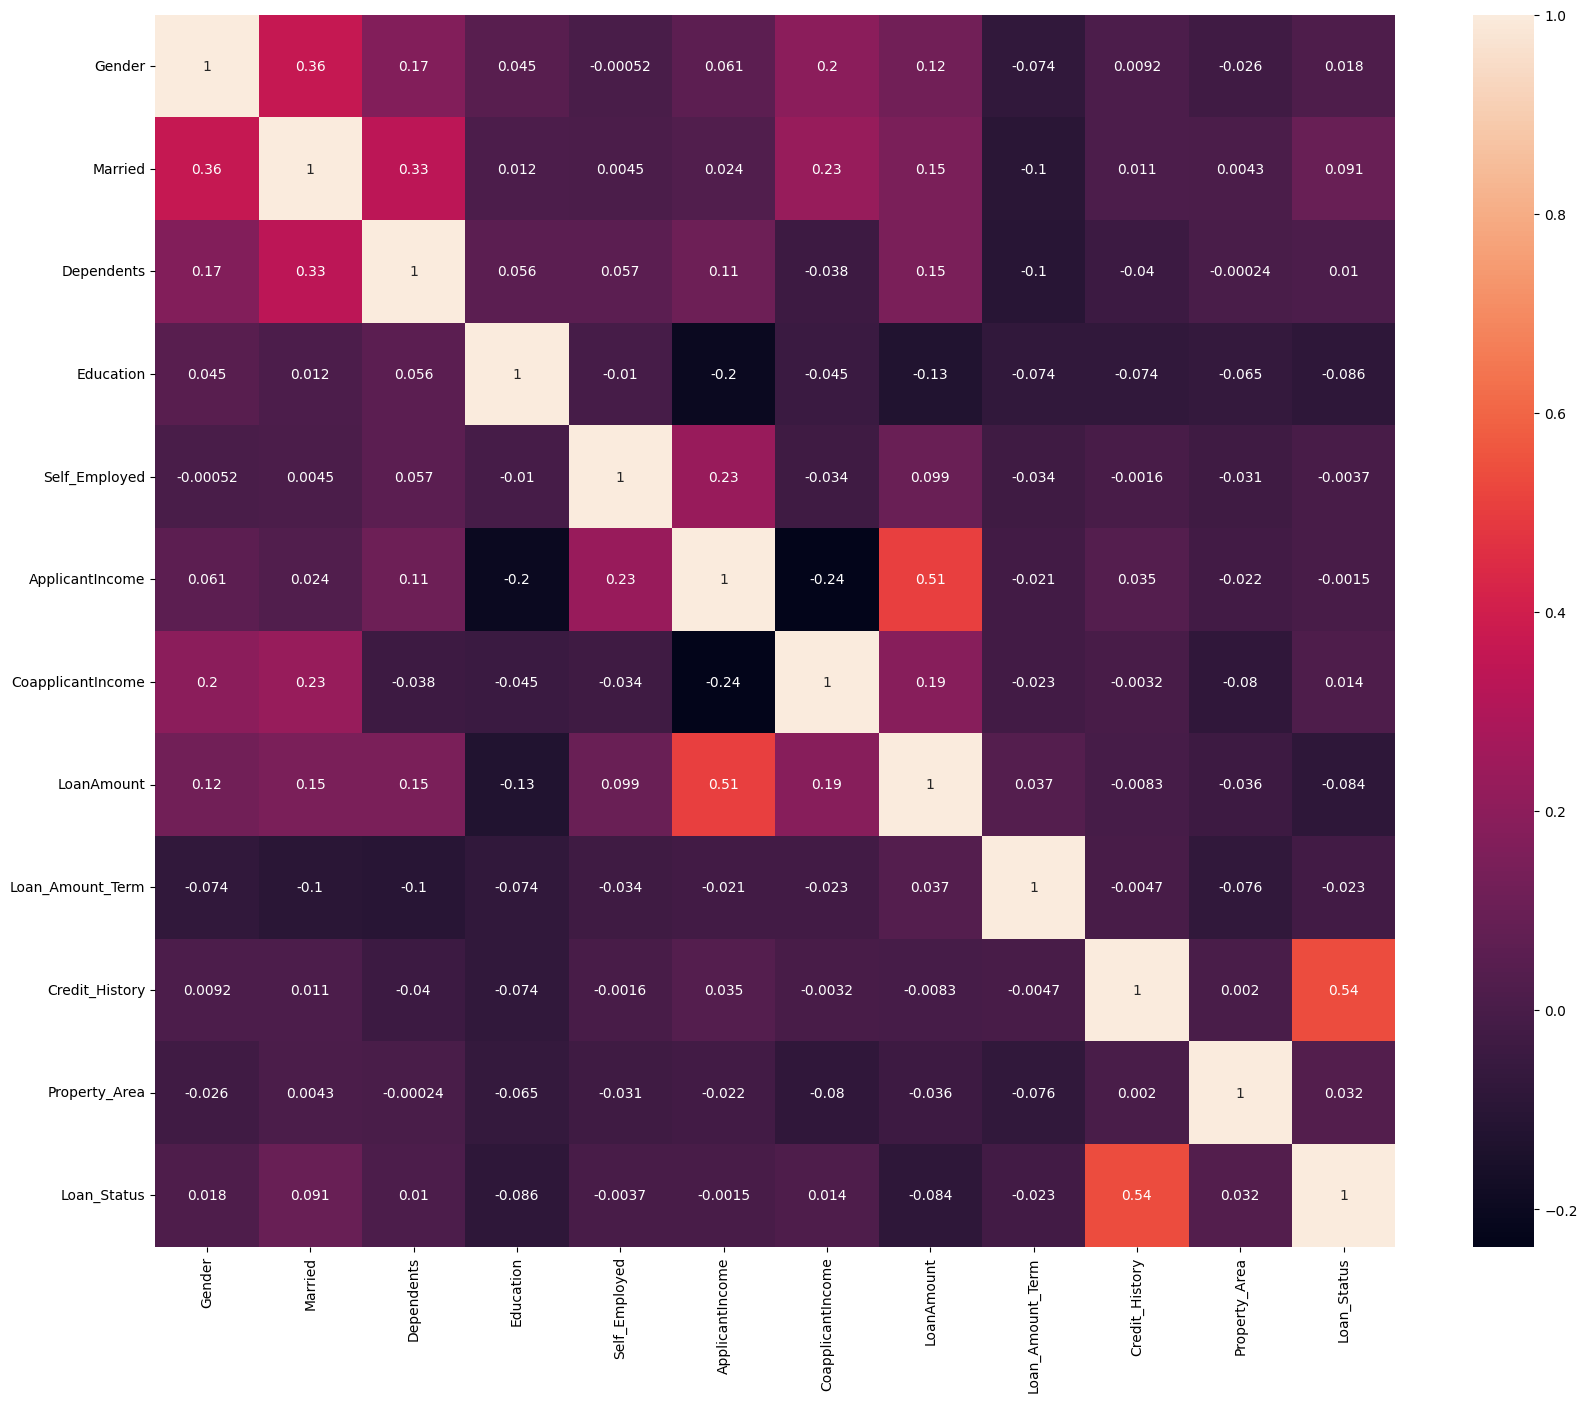

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(data.corr(), fmt='.2g', annot=True)

# Model Building

In [ ]:
data = data.astype('int64')

y = data['Loan_Status']
X = data.drop(['Loan_Status'],axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=42)

In [ ]:
print("Before OverSampling, counts of label 'Y': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label 'N': {}".format(sum(y_train == 0)))
  

sm = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_resampled.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_resampled.shape))

print("After OverSampling, counts of label 'Y': {}".format(sum(y_train_resampled == 0)))
print("After OverSampling, counts of label 'N': {}".format(sum(y_train_resampled == 1)))

Before OverSampling, counts of label 'Y': 322
Before OverSampling, counts of label 'N': 138
After OverSampling, the shape of train_X: (644, 11)
After OverSampling, the shape of train_y: (644,) 

After OverSampling, counts of label 'Y': 322
After OverSampling, counts of label 'N': 322


In [ ]:
# scale the features using StandardScaler
from sklearn.preprocessing import StandardScaler,RobustScaler, MinMaxScaler

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

In [ ]:
classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('XGBoost', XGBClassifier()),
    ('LightGBM', LGBMClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('SVM', SVC()),
    ('LDA', LinearDiscriminantAnalysis()),
    ('QDA', QuadraticDiscriminantAnalysis()),
    ('MLP', MLPClassifier()),
    ('Gaussian Process', GaussianProcessClassifier()),
    ('Bagging', BaggingClassifier()),
    ('Extra Trees', ExtraTreesClassifier())
]

# Define the evaluation metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Define the weighted score coefficients
weights = {'accuracy': 0.4, 'precision': 0.1, 'recall': 0.1, 'f1': 0.2, 'roc_auc': 0.2}

# Evaluate each classifier using cross-validation
results = []
for name, clf in classifiers:
    cv_results = cross_validate(clf, X_train_resampled, y_train_resampled, scoring=scoring, cv=5, return_train_score=False)
    acc = cv_results['test_accuracy'].mean()
    pre = cv_results['test_precision'].mean()
    rec = cv_results['test_recall'].mean()
    f1 = cv_results['test_f1'].mean()
    roc = cv_results['test_roc_auc'].mean()
    weighted_score = acc * weights['accuracy'] + pre * weights['precision'] + rec * weights['recall'] + f1 * weights['f1'] + roc * weights['roc_auc']
    results.append((name, acc, pre, rec, f1, roc, weighted_score))

# Create a dataframe with the results and sort it by the weighted score
df_results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC', 'Weighted Score'])

# Sort the results by the weighted score
df_results.sort_values(by=['Weighted Score'], ascending=False, inplace=True)

df_results

,Classifier,Accuracy,Precision,Recall,F1-score,ROC AUC,Weighted Score
3,Random Forest,0.824673,0.795929,0.897356,0.839244,0.887320,0.844511
5,Gradient Boosting,0.821560,0.790630,0.900529,0.837666,0.872390,0.839751
10,LDA,0.812258,0.742420,0.981298,0.842761,0.852059,0.836239
7,LightGBM,0.812246,0.800444,0.860048,0.823863,0.891431,0.834006
9,SVM,0.809181,0.751506,0.947163,0.835616,0.860699,0.832802
6,XGBoost,0.815359,0.811399,0.841538,0.822235,0.884408,0.832766
11,QDA,0.810719,0.752351,0.944135,0.835775,0.856298,0.832351
0,Logistic Regression,0.810719,0.754181,0.944087,0.835985,0.852018,0.831715
8,Naive Bayes,0.806044,0.740982,0.962644,0.834953,0.851301,0.830031
4,AdaBoost,0.801369,0.769362,0.891106,0.820570,0.867394,0.824187


In [ ]:
RandomForest = RandomForestClassifier()

RandomForest.fit(X_train_resampled, y_train_resampled)
y_pred = RandomForest.predict(X_test)

print("Accuracy score : ",accuracy_score(y_pred,y_test))
print("precision score : ",precision_score(y_pred,y_test))
print("recall score : ",recall_score(y_pred,y_test))
print("f1 score : ",f1_score(y_pred,y_test))
print("\nclassification report \n")
print(classification_report(y_pred,y_test))

Accuracy score :  0.7597402597402597
precision score :  0.92
recall score :  0.7603305785123967
f1 score :  0.832579185520362

classification report 

              precision    recall  f1-score   support

           0       0.46      0.76      0.57        33
           1       0.92      0.76      0.83       121

    accuracy                           0.76       154
   macro avg       0.69      0.76      0.70       154
weighted avg       0.82      0.76      0.78       154



In [ ]:
# Define an objective function for Optuna to maximize
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'class_weight': trial.suggest_categorical('class_weight', ['balanced', 'balanced_subsample', None]),
        'random_state': trial.suggest_int('random_state', 0, 100)
    }

    clf = RandomForestClassifier(**params)
    clf.fit(X_train_resampled, y_train_resampled)

    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best set of hyperparameters and the corresponding accuracy
print('Best set of hyperparameters: ', study.best_params)
print('Best accuracy: ', study.best_value)

[I 2023-04-22 09:46:41,269] A new study created in memory with name: no-name-0180356a-da58-48b5-a2bf-1adca8c12fb0
[I 2023-04-22 09:46:43,064] Trial 0 finished with value: 0.7792207792207793 and parameters: {'n_estimators': 849, 'max_depth': 3, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True, 'criterion': 'gini', 'class_weight': 'balanced', 'random_state': 12}. Best is trial 0 with value: 0.7792207792207793.
[I 2023-04-22 09:46:44,155] Trial 1 finished with value: 0.7727272727272727 and parameters: {'n_estimators': 593, 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 'auto', 'bootstrap': False, 'criterion': 'gini', 'class_weight': 'balanced', 'random_state': 50}. Best is trial 0 with value: 0.7792207792207793.
[I 2023-04-22 09:46:45,352] Trial 2 finished with value: 0.7792207792207793 and parameters: {'n_estimators': 451, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'log2', 'boots

Best set of hyperparameters:  {'n_estimators': 903, 'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'auto', 'bootstrap': True, 'criterion': 'gini', 'class_weight': 'balanced', 'random_state': 42}
Best accuracy:  0.7987012987012987


In [ ]:
RandomForest = RandomForestClassifier(**study.best_params)

RandomForest.fit(X_train_resampled, y_train_resampled)
y_pred = RandomForest.predict(X_test)

print("Accuracy score : ",accuracy_score(y_pred,y_test))
print("precision score : ",precision_score(y_pred,y_test))
print("recall score : ",recall_score(y_pred,y_test))
print("f1 score : ",f1_score(y_pred,y_test))
print("\nclassification report \n")
print(classification_report(y_pred,y_test))         

Accuracy score :  0.7987012987012987
precision score :  0.98
recall score :  0.7716535433070866
f1 score :  0.8634361233480176

classification report 

              precision    recall  f1-score   support

           0       0.46      0.93      0.62        27
           1       0.98      0.77      0.86       127

    accuracy                           0.80       154
   macro avg       0.72      0.85      0.74       154
weighted avg       0.89      0.80      0.82       154

